## Modeling

__Clustering with the Iris Dataset__

* Choose features other than the ones used in the lesson.
* Visualize the results of your clustering.
* Use the elbow method to visually select a good value for k.
* Repeat the clustering, this time with 3 different features.

In [1]:
import numpy as np
import pandas as pd
import wrangle_mall

import matplotlib.pyplot as plt
import seaborn as sns

# supress scientific notation
np.set_printoptions(suppress=True)

#Have access to pydatasets
from pydataset import data

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
#acquire the data
iris = data('iris')

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
#Rename columns
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


I'm not going to split into train, validate and test for this exercise, but I know its something we should do in our project

In [6]:
#Define the independent variables for the model
#Can't use sepal length or petal length
X = iris[['sepal_width', 'petal_width']]

In [7]:
#Create the model
kmeans = KMeans(n_clusters = 3, random_state = 123)

#Fit the model
kmeans.fit(X)

#Make predictions
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [8]:
iris['cluster'] = kmeans.predict(X)

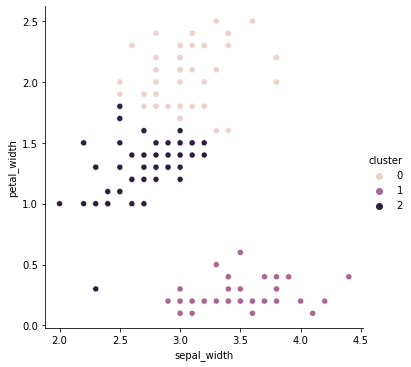

In [9]:
sns.relplot(x = 'sepal_width', y = 'petal_width', hue = 'cluster', data = iris)
plt.show()

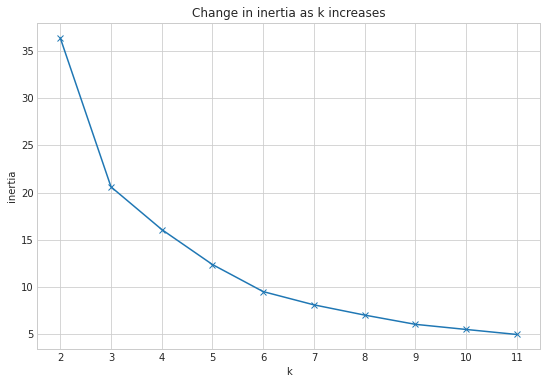

In [10]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [11]:
#Based on the above graph, it seems like a value of 3, 4, or 5 would be a good choice
#Now use 3 features instead of just 2
X = iris[['petal_length', 'petal_width', 'sepal_width']]

In [12]:
#Create the object
kmeans = KMeans(n_clusters = 3, random_state = 123)

#Fit the object
kmeans.fit(X)

#Make predictions
iris['cluster'] = kmeans.predict(X)

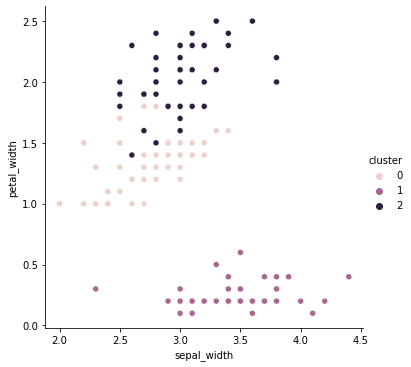

In [13]:
#Visualize clusters
sns.relplot(x = 'sepal_width', y = 'petal_width', hue = 'cluster', data = iris)
plt.show()

__Part 2__

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [14]:
#Acquire the data
customers = wrangle_mall.get_mall_data()
customers.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
#Will need to split into train, validate, and test.
#Then will encode gender for use in a model
train, validate, test = wrangle_mall.train_validate_test_split(customers.copy())

In [17]:
#Create dummy vars for gender
train, validate, test = wrangle_mall.get_dummy_vars(train, validate, test, customers.select_dtypes(['object']).columns)
train.head()

,customer_id,age,annual_income,spending_score,gender_Male
123,124,39,69,91,1
76,77,45,54,53,0
171,172,28,87,75,1
10,11,67,19,14,1
35,36,21,33,81,0


In [18]:
#Now split into X and y groups. Drop customer_id
X_train, y_train = train.drop(columns = ['customer_id', 'spending_score']), train.spending_score
X_validate, y_validate = validate.drop(columns = ['customer_id', 'spending_score']), validate.spending_score
X_test, y_test = test.drop(columns = ['customer_id', 'spending_score']), test.spending_score

I'm not going to scale right now, but I will later when answering question 3.
What is the best number of clusters to use?
I believe that exploration showed there were about 5 distinct groups, but let's use the elbow method to reinforce this idea

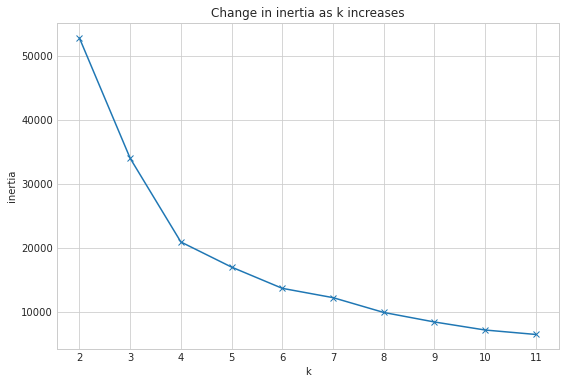

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_train).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [44]:
#5 or 6 clusters seems to be about right
#Create the model
kmeans = KMeans(n_clusters = 6, random_state = 123)

#Fit the model
kmeans.fit(X_train)

#Make predictions
train['cluster'] = kmeans.predict(X_train)

In [45]:
train.head()

,customer_id,age,annual_income,spending_score,gender_Male,cluster,cluster_scaled
123,124,39,69,91,1,5,5
76,77,45,54,53,0,0,0
171,172,28,87,75,1,5,5
10,11,67,19,14,1,4,3
35,36,21,33,81,0,1,2


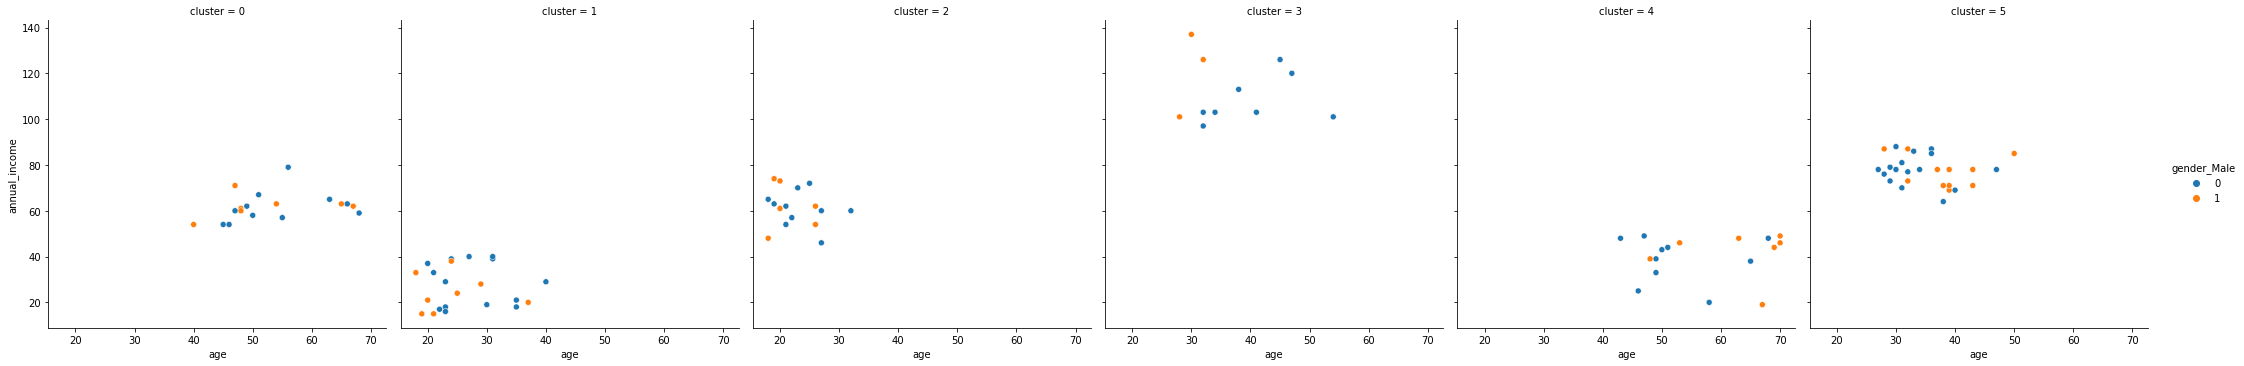

In [46]:
#Visualize results
sns.relplot(x = 'age', y = 'annual_income', hue = 'gender_Male', col = 'cluster', data = train)
plt.show()

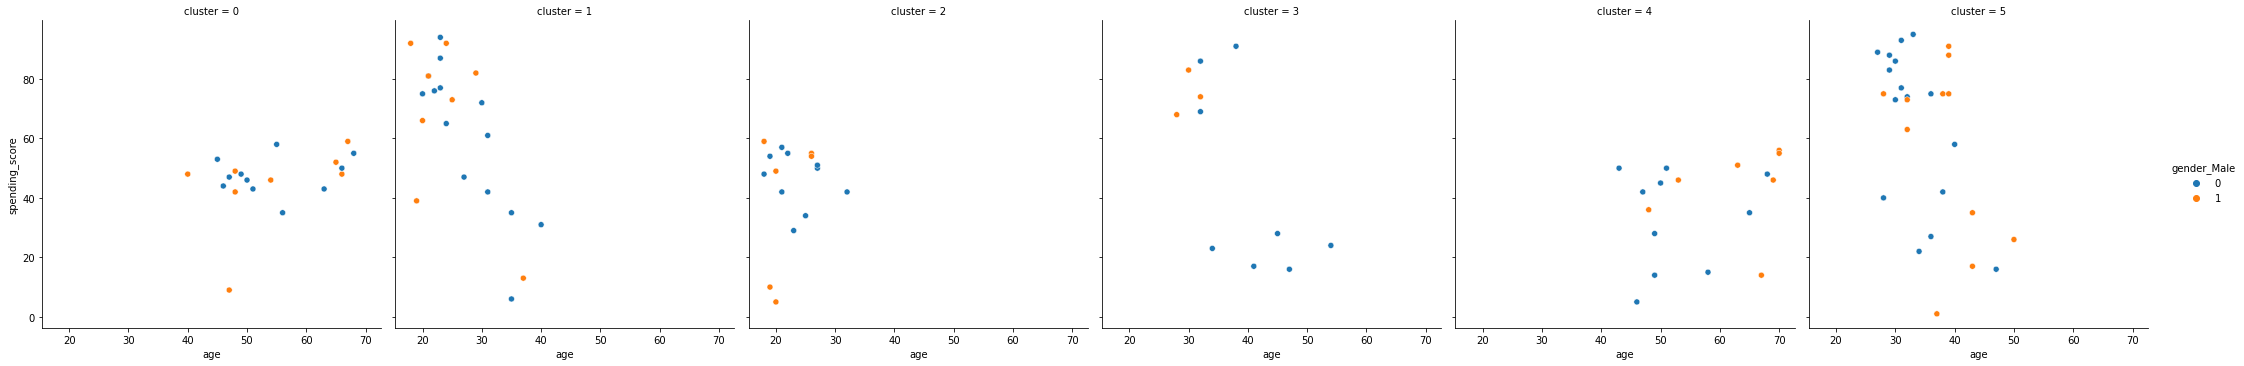

In [47]:
sns.relplot(x = 'age', y = 'spending_score', hue = 'gender_Male', col = 'cluster', data = train)
plt.show()

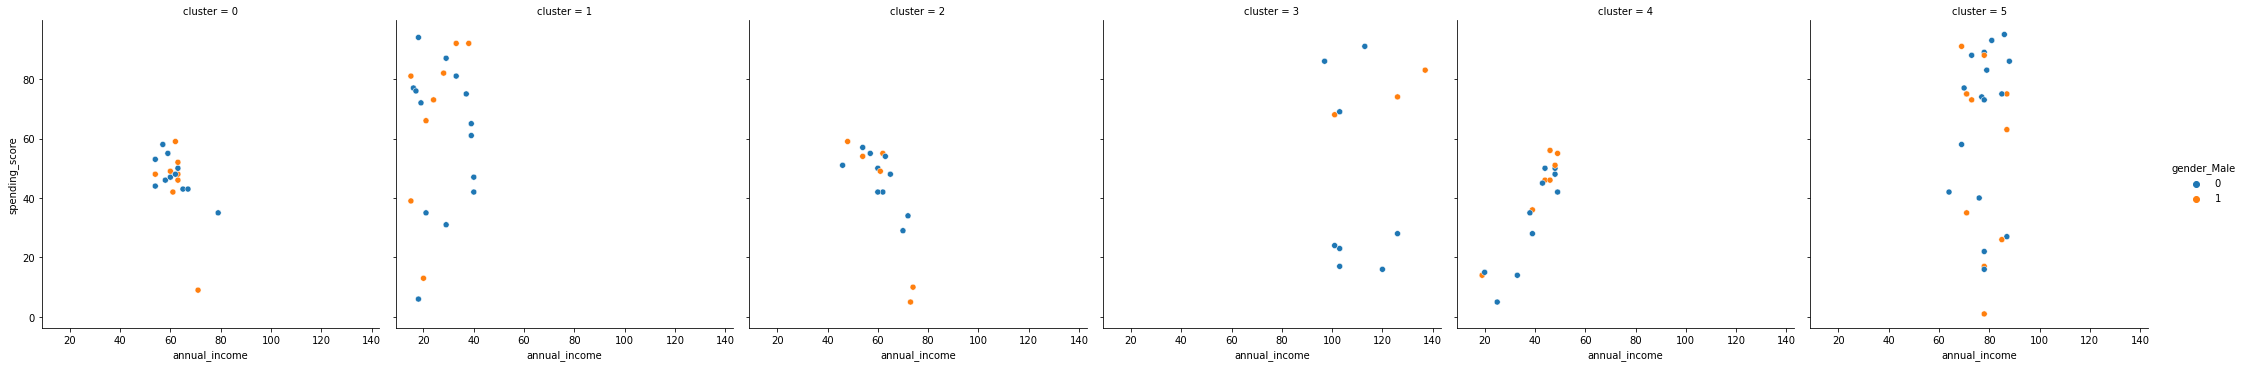

In [48]:
sns.relplot(x = 'annual_income', y = 'spending_score', hue = 'gender_Male', col = 'cluster', data = train)
plt.show()

How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [25]:
#Now I will scale the X data
X_train_scaled, X_validate_scaled, X_test_scaled = wrangle_mall.scale_data(X_train, X_validate, X_test)

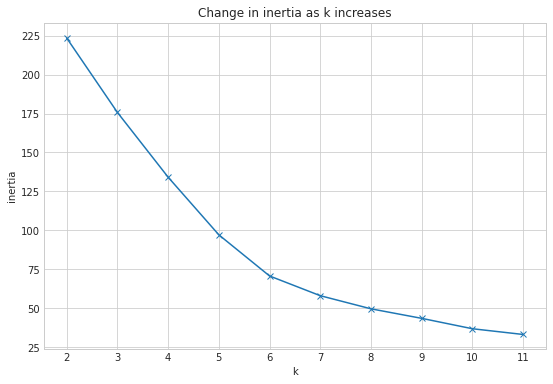

In [26]:
#Does scaling the data change the elbow?
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Surprisingly, it did! Now it seems that using 6 or 7 clusters may be the best choice, but I'm going to control for number of clusters and use the same as I did above.

In [39]:
#Create the model
kmeans = KMeans(n_clusters = 6, random_state = 123)

#Fit the model on scaled data
kmeans.fit(X_train_scaled)

#Make predictions
train['cluster_scaled'] = kmeans.predict(X_train_scaled)

In [40]:
train.head()

,customer_id,age,annual_income,spending_score,gender_Male,cluster,cluster_scaled
123,124,39,69,91,1,0,5
76,77,45,54,53,0,3,0
171,172,28,87,75,1,0,5
10,11,67,19,14,1,3,3
35,36,21,33,81,0,2,2


Right off the bat I can see that the clusters have changed quite a bit. This is not what I expected at all.

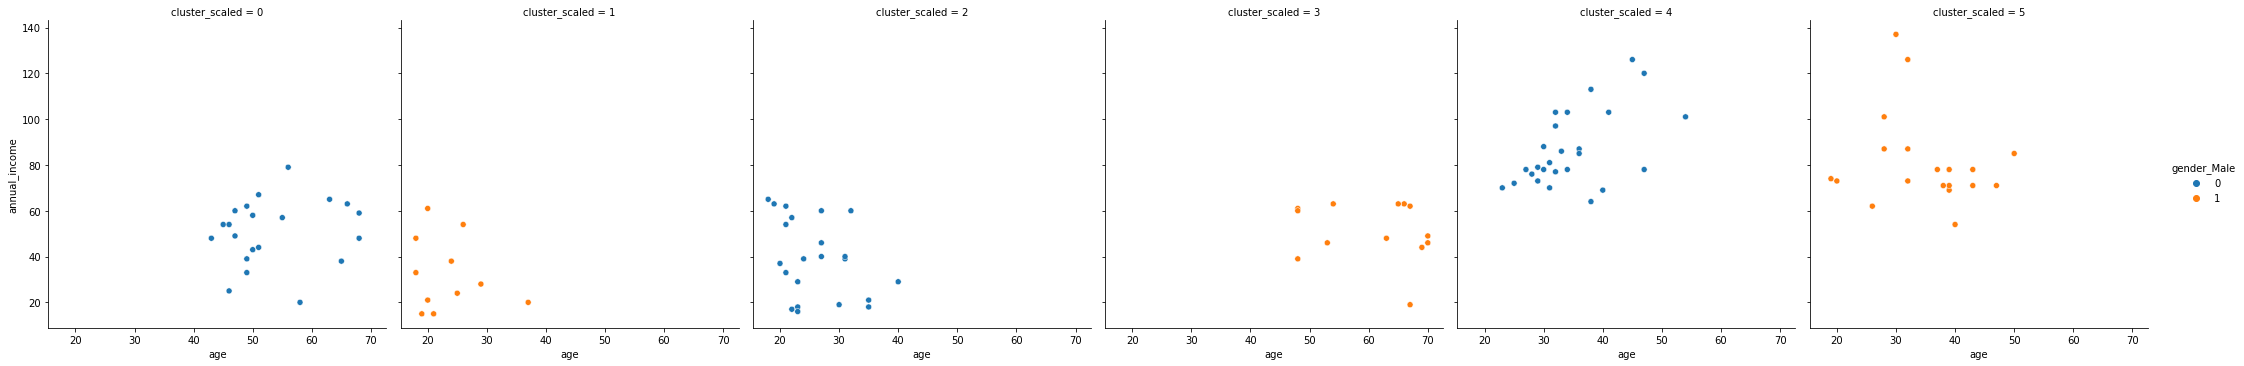

In [41]:
#Visualize results
sns.relplot(x = 'age', y = 'annual_income', hue = 'gender_Male', col = 'cluster_scaled', data = train)
plt.show()

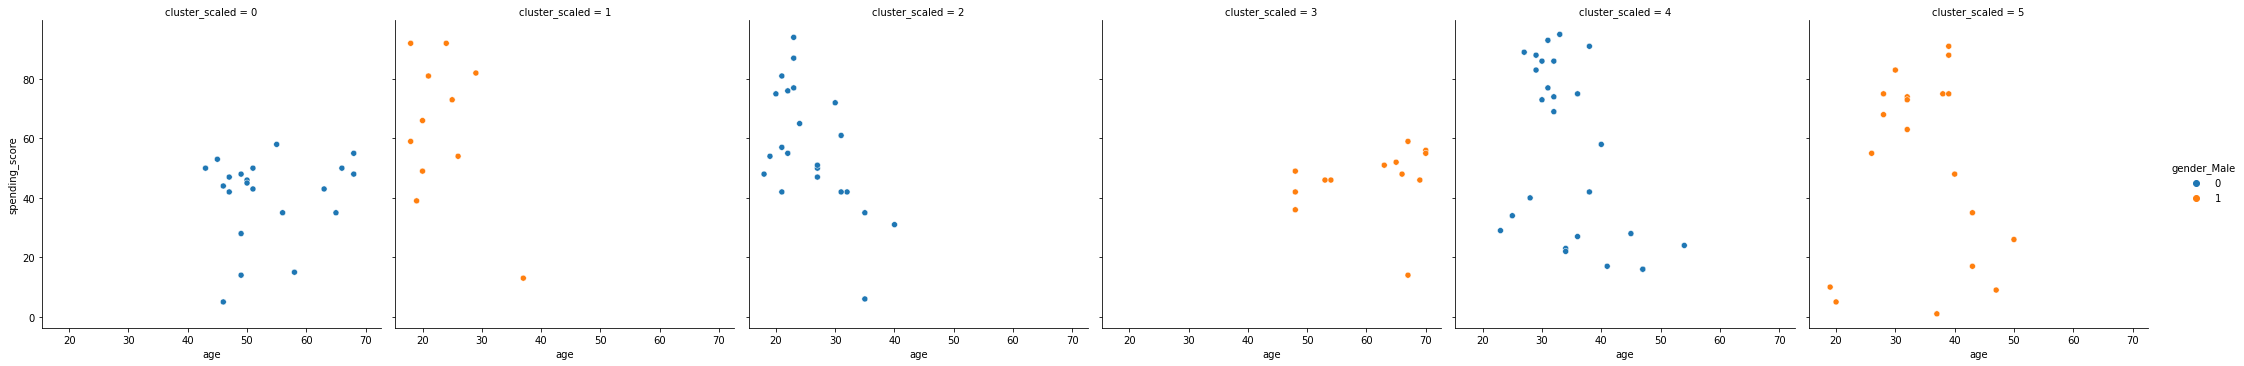

In [42]:
sns.relplot(x = 'age', y = 'spending_score', hue = 'gender_Male', col = 'cluster_scaled', data = train)
plt.show()

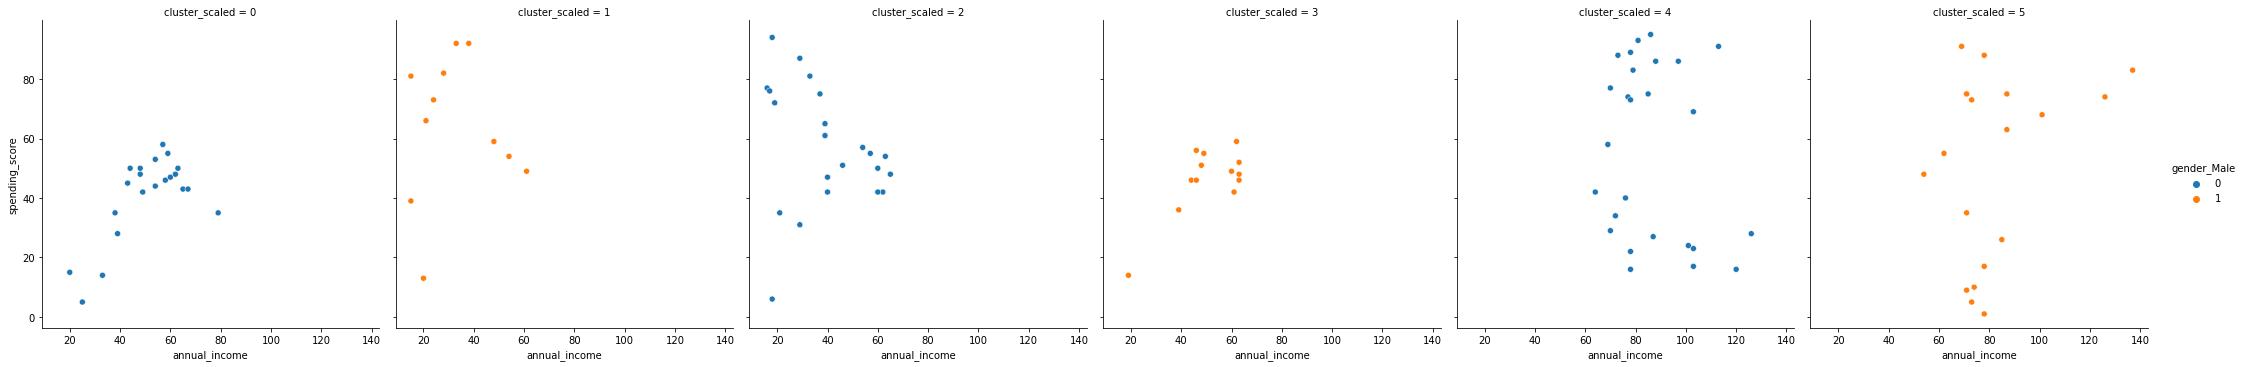

In [43]:
sns.relplot(x = 'annual_income', y = 'spending_score', hue = 'gender_Male', col = 'cluster_scaled', data = train)
plt.show()

Wow, thats quite a big difference in the groupings! Using scaled data allowed the clusters to completey separate Male and Female shoppers.